In [47]:
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

In [69]:
import sys
from zipfile import ZipFile
import os.path as op

In [70]:
!unzip datasets.zip

unzip:  cannot find either datasets.zip or datasets.zip.zip.


In [71]:
import glob, os, re
import sys
from zipfile import ZipFile
import os.path as op
import pandas as pd
from collections import defaultdict
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import json
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors

# **read data to pandas Data frame**

In [72]:
df = pd.read_csv('players.csv')

In [73]:
df.head()

,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,...,npg,npxG,xGChain,xGBuildup,id_player,GK,S,M,D,F
0,356_14-15_bundesliga,Alexander Meier,26,2209,19,15.395941,2,1.268694,80,22,...,16,12.364834,12.408789,1.915658,356,0,1,1,0,1
1,227_14-15_bundesliga,Robert Lewandowski,31,2493,17,17.722183,5,4.644013,104,32,...,16,16.964407,23.315430,4.924822,227,0,1,1,0,1
2,392_14-15_bundesliga,Arjen Robben,21,1681,17,10.364112,7,7.505970,88,50,...,15,8.848720,20.820983,8.605793,392,0,1,1,1,1
3,158_14-15_bundesliga,Bas Dost,21,1532,16,11.341977,4,2.659186,43,15,...,16,11.341977,15.911891,2.538306,158,0,1,0,0,1
4,318_14-15_bundesliga,Pierre-Emerick Aubameyang,33,2724,16,15.396760,6,6.378020,102,46,...,14,13.881207,20.852728,2.512650,318,0,1,1,0,1


In [74]:
data = df[df['id'].str.contains("_19-20") & df['id'].str.contains("_ligue1")]

In [75]:
data = df

In [76]:
# Look the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21725 entries, 0 to 21724
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            21725 non-null  object 
 1   player_name   21725 non-null  object 
 2   games         21725 non-null  int64  
 3   time          21725 non-null  int64  
 4   goals         21725 non-null  int64  
 5   xG            21725 non-null  float64
 6   assists       21725 non-null  int64  
 7   xA            21725 non-null  float64
 8   shots         21725 non-null  int64  
 9   key_passes    21725 non-null  int64  
 10  yellow_cards  21725 non-null  int64  
 11  red_cards     21725 non-null  int64  
 12  position      21725 non-null  object 
 13  team_title    21725 non-null  object 
 14  npg           21725 non-null  int64  
 15  npxG          21725 non-null  float64
 16  xGChain       21725 non-null  float64
 17  xGBuildup     21725 non-null  float64
 18  id_player     21725 non-nu

#*Correlation between gools and others metrics*

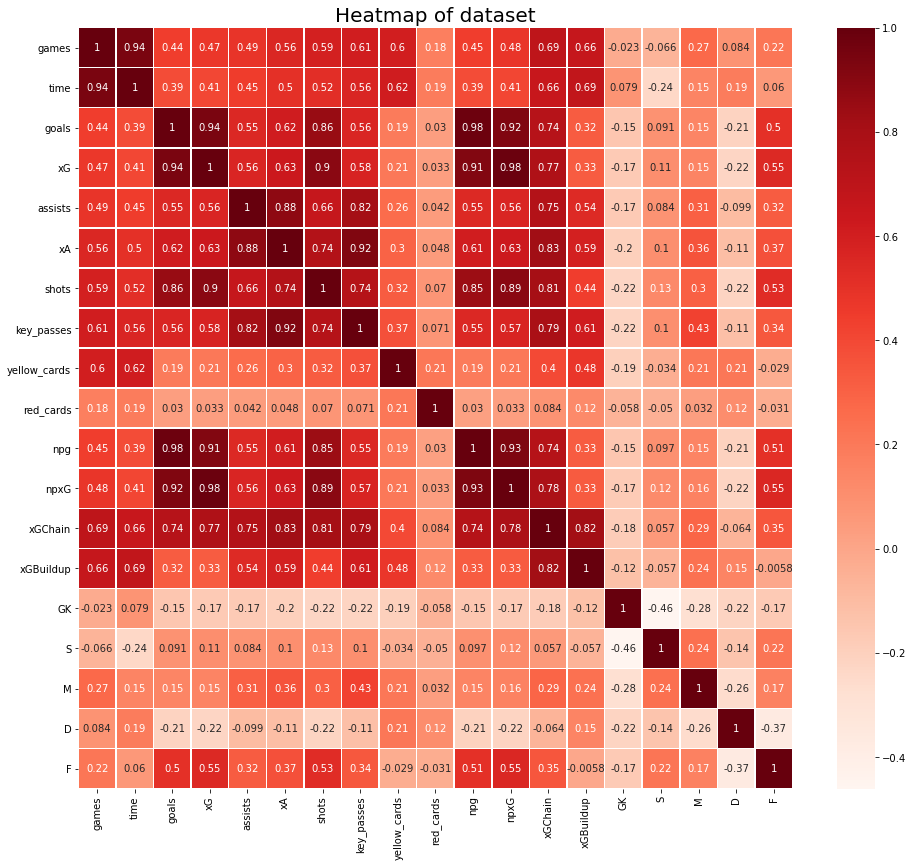

In [77]:
player_characteristics =['games', 'time', 'goals', 'xG','assists', 'xA','shots', 'key_passes',
                         'yellow_cards', 'red_cards', 'position', 'npg', 'npxG', 'xGChain', 'xGBuildup','GK','S','M','D','F']

plt.figure(figsize= (16, 14))
hm=sns.heatmap(data.loc[:, player_characteristics].corr(), annot = True, linewidths=.5, cmap='Reds')
hm.set_title(label='Heatmap of dataset', fontsize=20)
hm;

<ipython-input-78-450fda91a4cd>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(feats)/4+1, 4, index+1)
<ipython-input-78-450fda91a4cd>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(feats)/4+1, 4, index+1)
<ipython-input-78-450fda91a4cd>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(feats)/4+1, 4, index+1)
<ipython-input-78-450fda91a4cd>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(feats)/4+1, 4, index+1)


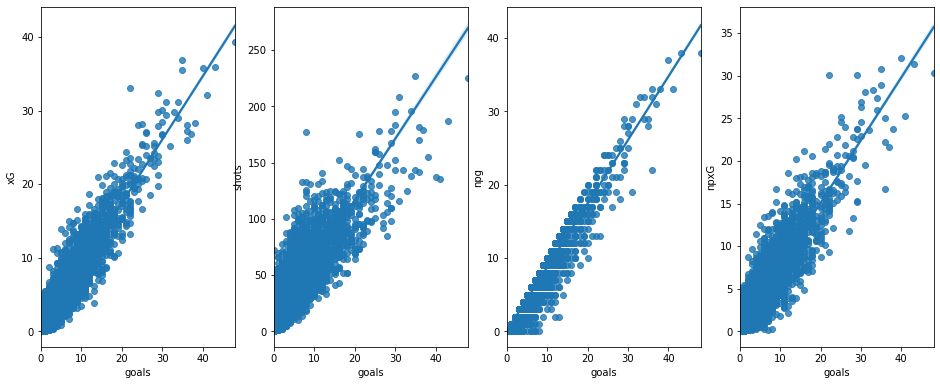

In [78]:
# Correlation between goals and other
def make_scatter(df):
    feats = ('xG', 'shots', 'npg', 'npxG')
    
    for index, feat in enumerate(feats):
        plt.subplot(len(feats)/4+1, 4, index+1)
        ax = sns.regplot(x='goals', y=feat, data=df)

plt.figure(figsize=(16,15))
plt.subplots_adjust(hspace=0.4)

make_scatter(data)

<ipython-input-79-be8c19d9439f>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(feats)/2+1, 2, index+1)
<ipython-input-79-be8c19d9439f>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(feats)/2+1, 2, index+1)


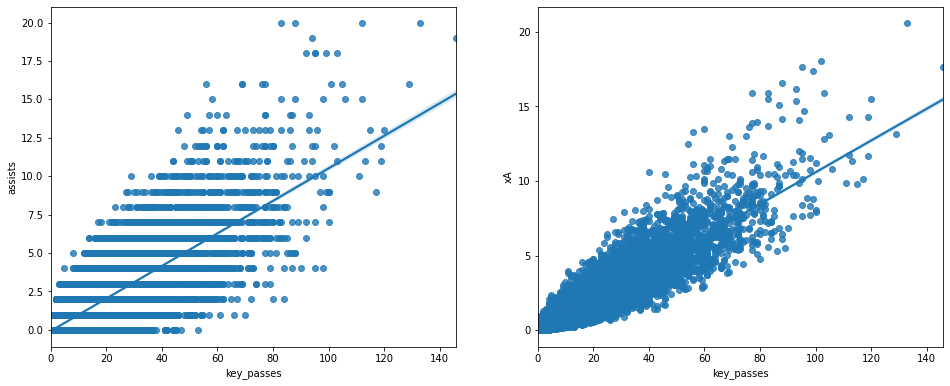

In [79]:
# Correlation between key_passes and other
def make_scatter(df):
    feats = ('assists', 'xA')
    
    for index, feat in enumerate(feats):
        plt.subplot(len(feats)/2+1, 2, index+1)
        ax = sns.regplot(x='key_passes', y=feat, data=df)

plt.figure(figsize=(16,15))
plt.subplots_adjust(hspace=0.4)

make_scatter(data)

#*Goalkeeper clustering*

In [80]:
pd.unique(data["position"])

array(['F M S', 'D F M S', 'F S', 'F', 'M S', 'F M', 'D', 'M', 'D M S',
       'D S', 'D M', 'GK', 'S', 'GK S', 'D F M', 'D F S', 'D F'],
      dtype=object)

In [81]:
data.loc[data['position']=='F']

,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,...,npg,npxG,xGChain,xGBuildup,id_player,GK,S,M,D,F
6,341_14-15_bundesliga,Franco Di Santo,26,2301,13,9.417812,2,1.789214,54,24,...,10,6.386785,9.532525,2.385641,341,0,0,0,0,1
427,4339_14-15_bundesliga,Mats Møller Dæhli,2,180,0,0.048242,0,0.500316,1,3,...,0,0.048242,0.693326,0.576779,4339,0,0,0,0,1
549,426_15-16_bundesliga,Daniel Ginczek,7,630,3,3.731655,1,1.005792,18,12,...,2,2.973958,4.486752,0.889057,426,0,0,0,0,1
931,137_16-17_bundesliga,Anthony Modeste,34,2983,25,20.458601,2,1.852798,101,19,...,22,17.427737,18.945138,4.138791,137,0,0,0,0,1
937,29_16-17_bundesliga,Vedad Ibisevic,32,2732,12,13.618102,4,1.848171,72,19,...,9,11.344852,14.972123,3.986802,29,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20025,1186_18-19_seriea,Andrea Belotti,37,3304,15,17.005231,3,4.310058,125,35,...,10,12.437680,16.587279,3.120273,1186,0,0,0,0,1
20057,1293_18-19_seriea,Gonzalo Higuaín,15,1282,6,7.021015,1,1.610850,55,19,...,6,6.259716,10.889037,3.325404,1293,0,0,0,0,1
20537,7285_18-19_seriea,Riccardo Doratiotto,1,81,0,0.000000,0,0.000000,0,0,...,0,0.000000,0.000000,0.000000,7285,0,0,0,0,1
20560,2371_19-20_seriea,Cristiano Ronaldo,33,2920,31,29.431679,5,6.067226,208,51,...,19,19.534956,26.553609,7.224642,2371,0,0,0,0,1


**OneHot Encoding**

In [82]:
data_f = data.loc[data['position']=='F']

In [83]:
X=pd.DataFrame(data_f["position"])
enc = OneHotEncoder()
enc.fit(X)

OneHotEncoder()

In [84]:
enc.transform(X).toarray()

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [86]:
enc.categories_

[array(['F'], dtype=object)]

In [87]:
data_f[enc.categories_[0]]=enc.transform(X).toarray()

<ipython-input-87-1ec87d876fd9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f[enc.categories_[0]]=enc.transform(X).toarray()
C:\Users\Mahmoud\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [88]:
names=data_f["player_name"]
data_f=data_f.set_index("player_name")

In [89]:
data1 = data_f.drop(["position","games",'S','M','D','F','id'],axis=1)

In [90]:
for i in ["goals","xG","assists","xA","shots","key_passes","yellow_cards","red_cards","npg","npxG","xGChain","xGBuildup"]:
  data1[i]=data1[i]/data1["time"]

In [91]:
data1.drop(["time"],axis=1,inplace=True)

In [92]:
x=data1.drop(["team_title"],axis=1)

In [93]:
x.dropna(inplace=True,axis=1)

In [94]:
max=np.array(x.describe().loc["max"])
j=0
for i in x.columns:
  x[i]=x[i]/max[j]
  j=j+1

In [95]:
x1=x.transpose()

In [96]:
corr_matrix=x1.corr(method="pearson")

In [97]:
corr_matrix

player_name,Franco Di Santo,Mats Møller Dæhli,Daniel Ginczek,Anthony Modeste,Vedad Ibisevic,Alfred Finnbogason,Ousman Manneh,Bas Dost,Pierre-Emerick Aubameyang,Alfred Finnbogason,...,Umar Sadiq,Simone Palombi,Fabio Ceravolo,Fabio Quagliarella,Francesco Caputo,Andrea Belotti,Gonzalo Higuaín,Riccardo Doratiotto,Cristiano Ronaldo,André Silva
player_name,,,,,,,,,,,,,,,,,,,,,
Franco Di Santo,1.000000,-0.368094,0.789103,0.891699,0.498386,-0.266760,0.263764,-0.344421,0.481134,0.757843,...,0.371652,-0.364754,-0.261589,0.839818,0.241908,0.816210,0.112284,-0.412165,0.825509,-0.008426
Mats Møller Dæhli,-0.368094,1.000000,-0.033037,-0.415475,-0.573815,-0.174898,0.138311,-0.036986,-0.427547,0.089960,...,-0.176074,0.659589,0.414976,-0.276157,0.455133,-0.124577,-0.272063,0.487762,-0.149812,-0.024697
Daniel Ginczek,0.789103,-0.033037,1.000000,0.773345,0.539067,-0.080615,0.387535,-0.143012,0.616932,0.903752,...,0.579999,-0.239452,-0.206091,0.845456,0.384910,0.882195,0.244399,-0.380409,0.838993,-0.218141
Anthony Modeste,0.891699,-0.415475,0.773345,1.000000,0.658972,-0.044887,0.370806,-0.363115,0.720046,0.807495,...,0.579710,-0.264600,-0.167033,0.921579,0.346767,0.831564,0.287960,-0.336092,0.880158,-0.187124
Vedad Ibisevic,0.498386,-0.573815,0.539067,0.658972,1.000000,0.601600,0.160781,-0.360057,0.937344,0.383861,...,0.522444,-0.378653,-0.347587,0.568179,-0.063886,0.542070,0.837828,-0.521978,0.545996,-0.210807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Andrea Belotti,0.816210,-0.124577,0.882195,0.831564,0.542070,-0.096653,0.578575,-0.307416,0.587185,0.869325,...,0.653707,-0.216270,0.055292,0.937056,0.514641,1.000000,0.264781,-0.204732,0.976285,-0.008328
Gonzalo Higuaín,0.112284,-0.272063,0.244399,0.287960,0.837828,0.871082,0.024603,-0.436911,0.768327,0.121561,...,0.264915,-0.162861,-0.165161,0.218699,-0.076931,0.264781,1.000000,-0.304231,0.266441,-0.253059
Riccardo Doratiotto,-0.412165,0.487762,-0.380409,-0.336092,-0.521978,0.001832,0.454283,-0.116713,-0.382489,-0.039214,...,0.108229,0.653118,0.945366,-0.246148,0.682847,-0.204732,-0.304231,1.000000,-0.182332,0.430858


**Kmeans**

In [98]:
kmeans = KMeans(random_state=0).fit(corr_matrix)

In [99]:
for i in range(len(kmeans.labels_)):
  if kmeans.labels_[i]==0:
    #print(x.iloc[i])
    pass

In [100]:
len(kmeans.labels_)

124

In [101]:
len(kmeans.cluster_centers_)

8

In [102]:
X=PCA(n_components=2).fit_transform(x)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

<ipython-input-103-e9db1dc32312>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot()


TypeError: '(slice(None, None, None), 0)' is an invalid key

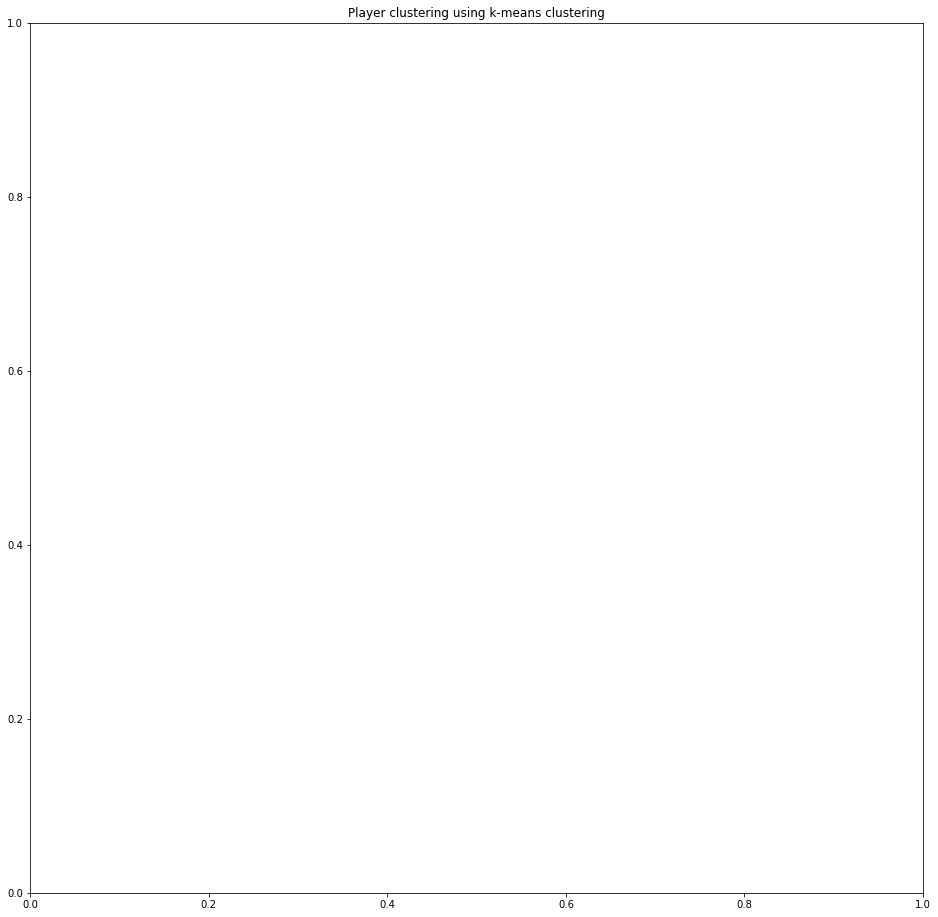

In [103]:
fig=plt.figure(figsize=(16,16))
plt.title("Player clustering using k-means clustering")
names=np.array(names)
ax = fig.add_subplot()
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_)
for i in range(len(X)):
  ax.text(X[i][0],X[i][1],names[i])

#*Players analysis*

Pour analyser les joueurs, je vais utiliser un graphique en radar. Cela devrait être familier à ceux qui jouent à la FIFA. De plus, les graphiques sont normalisés par la valeur la plus élevée du cadre de données pour les placer dans le même cadre. Cela place toutes les valeurs sur une échelle de 0 à 1, 1 étant la plus élevée dans chaque catégorie. Pour illustrer cela, regardons les 2 meilleurs joueurs de l'EPL et comparons leurs performances.

In [106]:
player_season_stats = df.groupby(['team_title','player_name'],as_index = False)[['goals','assists','shots','key_passes','xG','xA','xGBuildup', 'xGChain']].sum()
player_season_stats = player_season_stats.sort_values(['team_title','xG'],ascending = False)
p_s_s_top5_scaled = player_season_stats.copy()
attrs =  ['goals', 'assists', 'shots', 'key_passes', 'xA', 'xGBuildup', 'xGChain','assists']
p_s_s_top5_scaled[attrs] = p_s_s_top5_scaled[attrs] / p_s_s_top5_scaled[attrs].max() 
p_s_s_top5_scaled_stats = p_s_s_top5_scaled[['team_title','player_name', 'goals', 'assists','shots', 'key_passes']]
p_s_s_top5_scaled_stats_melted = p_s_s_top5_scaled_stats.melt(id_vars = ['team_title','player_name'],value_vars = [ 'goals', 'assists','shots', 'key_passes'])
p_s_s_top5_scaled_stats_melted = p_s_s_top5_scaled_stats_melted.merge(player_season_stats[['team_title','xG','player_name']], how = 'left', on = 'team_title')
p_s_s_top5_scaled_stats_melted = p_s_s_top5_scaled_stats_melted.sort_values(['xG','variable'], ascending = False)

In [107]:
p_s_s_top5_scaled = p_s_s_top5_scaled.sort_values('xG',ascending = False)

radar_cols = ['goals', 'assists', 'shots', 'key_passes']
fig = go.Figure()
for i in range(2):
    fig.add_trace(go.Scatterpolar(
          r=p_s_s_top5_scaled[radar_cols].iloc[i],
          theta=radar_cols,
          fill='toself',
          name=p_s_s_top5_scaled['player_name'].iloc[i]))


fig.update_layout(polar=dict(radialaxis=dict(visible=True,range=[0, 1])),showlegend=True, title = 'Messi vs Lewandowski')

fig.show()

Vous pouvez filtrer le graphique en cliquant ou en double-cliquant sur la légende dans le coin supérieur droit.

De Bruyne était le leader de la ligue pour les passes décisives et les passes décisives. Cela a du sens étant donné qu'il est vraiment une force sur la nature en termes de créativité.

Salah mène la ligue en termes de tirs mais la conversion semble être faible. Nous approfondirons ces deux facteurs à un stade ultérieur. Pour l'instant, mettons-nous à l'aise avec l'apparence et la convivialité de ces graphiques.

In [108]:
fig = go.Figure()
for i in range(5):
    fig.add_trace(go.Scatterpolar(
          r=p_s_s_top5_scaled[radar_cols].iloc[i],
          theta=radar_cols,
          fill='toself',
          name=p_s_s_top5_scaled['player_name'].iloc[i]))


fig.update_layout(polar=dict(radialaxis=dict(visible=True,range=[0, 1])),showlegend=True, title = "Top 5 players")

fig.show()

#*Players simalarity*

In [109]:
field_cols =['player_name','id','team_title','games', 'time', 'goals','position', 'xG','assists', 'xA','shots', 'key_passes',
                         'yellow_cards', 'red_cards','npg', 'npxG', 'xGChain', 'xGBuildup','GK','S','M','D','F']

basic_info = df[field_cols]
basic_info.head()

,player_name,id,team_title,games,time,goals,position,xG,assists,xA,...,red_cards,npg,npxG,xGChain,xGBuildup,GK,S,M,D,F
0,Alexander Meier,356_14-15_bundesliga,Eintracht Frankfurt,26,2209,19,F M S,15.395941,2,1.268694,...,0,16,12.364834,12.408789,1.915658,0,1,1,0,1
1,Robert Lewandowski,227_14-15_bundesliga,Bayern Munich,31,2493,17,F M S,17.722183,5,4.644013,...,0,16,16.964407,23.315430,4.924822,0,1,1,0,1
2,Arjen Robben,392_14-15_bundesliga,Bayern Munich,21,1681,17,D F M S,10.364112,7,7.505970,...,0,15,8.848720,20.820983,8.605793,0,1,1,1,1
3,Bas Dost,158_14-15_bundesliga,Wolfsburg,21,1532,16,F S,11.341977,4,2.659186,...,0,16,11.341977,15.911891,2.538306,0,1,0,0,1
4,Pierre-Emerick Aubameyang,318_14-15_bundesliga,Borussia Dortmund,33,2724,16,F M S,15.396760,6,6.378020,...,0,14,13.881207,20.852728,2.512650,0,1,1,0,1


In [110]:
basic_info.dtypes

player_name      object
id               object
team_title       object
games             int64
time              int64
goals             int64
position         object
xG              float64
assists           int64
xA              float64
shots             int64
key_passes        int64
yellow_cards      int64
red_cards         int64
npg               int64
npxG            float64
xGChain         float64
xGBuildup       float64
GK                int64
S                 int64
M                 int64
D                 int64
F                 int64
dtype: object

In [111]:
basic_info1 = basic_info.copy()
basic_info1['xG'] = basic_info1['xG'].apply(lambda x: str(x))

basic_info2 = basic_info1.copy()
basic_info2['npxG'] = basic_info2['npxG'].apply(lambda x: str(x))
basic_info2.dtypes

player_name      object
id               object
team_title       object
games             int64
time              int64
goals             int64
position         object
xG               object
assists           int64
xA              float64
shots             int64
key_passes        int64
yellow_cards      int64
red_cards         int64
npg               int64
npxG             object
xGChain         float64
xGBuildup       float64
GK                int64
S                 int64
M                 int64
D                 int64
F                 int64
dtype: object

In [112]:
basic_info_dict = {}
for i in basic_info.index:
    basic_info_dict[i] = basic_info2.iloc[i,:].values.tolist()

In [113]:
#Feature Selection for similarity
df = df.copy()
df2 = df.drop(columns=['id', 'time', 'team_title', 'GK'])
df2.head()

,player_name,games,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,npg,npxG,xGChain,xGBuildup,id_player,S,M,D,F
0,Alexander Meier,26,19,15.395941,2,1.268694,80,22,0,0,F M S,16,12.364834,12.408789,1.915658,356,1,1,0,1
1,Robert Lewandowski,31,17,17.722183,5,4.644013,104,32,0,0,F M S,16,16.964407,23.315430,4.924822,227,1,1,0,1
2,Arjen Robben,21,17,10.364112,7,7.505970,88,50,0,0,D F M S,15,8.848720,20.820983,8.605793,392,1,1,1,1
3,Bas Dost,21,16,11.341977,4,2.659186,43,15,1,0,F S,16,11.341977,15.911891,2.538306,158,1,0,0,1
4,Pierre-Emerick Aubameyang,33,16,15.396760,6,6.378020,102,46,4,0,F M S,14,13.881207,20.852728,2.512650,318,1,1,0,1


In [114]:
df3 = df2.drop('position',axis=1)
df3.head()

,player_name,games,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,npg,npxG,xGChain,xGBuildup,id_player,S,M,D,F
0,Alexander Meier,26,19,15.395941,2,1.268694,80,22,0,0,16,12.364834,12.408789,1.915658,356,1,1,0,1
1,Robert Lewandowski,31,17,17.722183,5,4.644013,104,32,0,0,16,16.964407,23.315430,4.924822,227,1,1,0,1
2,Arjen Robben,21,17,10.364112,7,7.505970,88,50,0,0,15,8.848720,20.820983,8.605793,392,1,1,1,1
3,Bas Dost,21,16,11.341977,4,2.659186,43,15,1,0,16,11.341977,15.911891,2.538306,158,1,0,0,1
4,Pierre-Emerick Aubameyang,33,16,15.396760,6,6.378020,102,46,4,0,14,13.881207,20.852728,2.512650,318,1,1,0,1


In [115]:
df3.columns

Index(['player_name', 'games', 'goals', 'xG', 'assists', 'xA', 'shots',
       'key_passes', 'yellow_cards', 'red_cards', 'npg', 'npxG', 'xGChain',
       'xGBuildup', 'id_player', 'S', 'M', 'D', 'F'],
      dtype='object')

In [116]:
df3_num = df3[['games', 'goals', 'xG', 'assists', 'xA', 'shots',
       'key_passes', 'yellow_cards', 'red_cards', 'npg', 'npxG', 'xGChain',
       'xGBuildup']]

df3_num.head()

,games,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,npg,npxG,xGChain,xGBuildup
0,26,19,15.395941,2,1.268694,80,22,0,0,16,12.364834,12.408789,1.915658
1,31,17,17.722183,5,4.644013,104,32,0,0,16,16.964407,23.315430,4.924822
2,21,17,10.364112,7,7.505970,88,50,0,0,15,8.848720,20.820983,8.605793
3,21,16,11.341977,4,2.659186,43,15,1,0,16,11.341977,15.911891,2.538306
4,33,16,15.396760,6,6.378020,102,46,4,0,14,13.881207,20.852728,2.512650


In [117]:
df3_cat = df3[['S', 'M', 'D', 'F']]

df3_cat.head()

,S,M,D,F
0,1,1,0,1
1,1,1,0,1
2,1,1,1,1
3,1,0,0,1
4,1,1,0,1


In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df3_num_scaled_arr = scaler.fit_transform(df3_num)
df3_num_scaled = pd.DataFrame(df3_num_scaled_arr,columns=df3_num.columns)
df3_num_scaled.head()

,games,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,npg,npxG,xGChain,xGBuildup
0,0.669095,5.195603,4.489039,0.399712,0.020609,2.987988,0.641162,-0.981731,-0.357718,4.907448,4.042073,1.529015,-0.266346
1,1.118371,4.593940,5.255220,1.911420,1.933294,4.117015,1.294467,-0.981731,-0.357718,4.907448,5.770521,3.673472,0.736616
2,0.219818,4.593940,2.831733,2.919225,3.555073,3.364330,2.470417,-0.981731,-0.357718,4.567390,2.720772,3.183015,1.963494
3,0.219818,4.293108,3.153807,1.407517,0.808556,1.247404,0.183849,-0.611104,-0.357718,4.907448,3.657699,2.217793,-0.058816
4,1.298082,4.293108,4.489308,2.415322,2.915900,4.022929,2.209095,0.500777,-0.357718,4.227332,4.611902,3.189257,-0.067367


In [119]:
df4 = pd.concat([df3.player_name,df3_num_scaled,df3_cat],axis='columns')
df4.head()

,player_name,games,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,npg,npxG,xGChain,xGBuildup,S,M,D,F
0,Alexander Meier,0.669095,5.195603,4.489039,0.399712,0.020609,2.987988,0.641162,-0.981731,-0.357718,4.907448,4.042073,1.529015,-0.266346,1,1,0,1
1,Robert Lewandowski,1.118371,4.593940,5.255220,1.911420,1.933294,4.117015,1.294467,-0.981731,-0.357718,4.907448,5.770521,3.673472,0.736616,1,1,0,1
2,Arjen Robben,0.219818,4.593940,2.831733,2.919225,3.555073,3.364330,2.470417,-0.981731,-0.357718,4.567390,2.720772,3.183015,1.963494,1,1,1,1
3,Bas Dost,0.219818,4.293108,3.153807,1.407517,0.808556,1.247404,0.183849,-0.611104,-0.357718,4.907448,3.657699,2.217793,-0.058816,1,0,0,1
4,Pierre-Emerick Aubameyang,1.298082,4.293108,4.489308,2.415322,2.915900,4.022929,2.209095,0.500777,-0.357718,4.227332,4.611902,3.189257,-0.067367,1,1,0,1


In [120]:
## splitting the dataset into independent and dependent variables

X = df4.iloc[:,1:].values
Y = df4.iloc[:,0].values

print(X.shape, Y.shape)

(21725, 17) (21725,)


In [121]:
vectors = {}
for i,x in enumerate(X):
    vectors[i] = x.tolist()

## vector for Alexander Meier
vectors[0]

[0.669094617673295,
 5.19560334665077,
 4.489038592493757,
 0.39971240279620085,
 0.020608911414082155,
 2.987987596830541,
 0.6411622356485063,
 -0.981730843626851,
 -0.35771774285948343,
 4.9074476105116975,
 4.042073165733069,
 1.5290147496805606,
 -0.2663458250845498,
 1.0,
 1.0,
 0.0,
 1.0]

In [122]:
def cosine_similarity(vec1,vec2):
    a = np.array(vec1).ravel()
    b = np.array(vec2).ravel()
    denom = np.sqrt(np.sum(np.square(vec1))) * np.sqrt(np.sum(np.square(vec2)))
    return np.dot(a,b) / denom

In [123]:
cosine_similarity(vectors[0],vectors[1])

0.9484707842738318

In [124]:
from sklearn.metrics import pairwise as pw

index = 0
def similar_players(index=0,top=10):
    similarity_scores = {}
    for k,v in vectors.items(): 
        similarity_scores[k] = cosine_similarity(vectors[index],v)
    similarity_scores = sorted(similarity_scores.items(), key = lambda item: item[1], reverse=True)
    return similarity_scores[1:top+1]

In [125]:
basic_info2[basic_info2.iloc[:,0]=='Robert Lewandowski'].index.values[0]

1

In [126]:
player = np.random.randint(0,20)
top_sim_players = similar_players(index=player,top=50)
print('Players similar to:',df4.loc[player,'player_name'],":\n")


top_players = {}
for index,similarity in top_sim_players:
    info = list(basic_info2.loc[index,['player_name','assists','position','xG']].values)
    info.insert(len(info),similarity)
    top_players[index] = info

output = pd.DataFrame.from_dict(data=top_players, orient='index',columns=['player_name','assists','position','xG','Similarity'])
output.sort_values(by=['Similarity'],ascending=False)

Players similar to: Stefan Aigner :



,player_name,assists,position,xG,Similarity
7016,Vicente Iborra,1,M S,6.881369683891535,0.969091
12484,Nolan Roux,1,F M S,8.950709921307864,0.950989
4954,Ashley Barnes,0,F M S,6.560562789440155,0.945938
17819,Luca Rigoni,1,M,5.997137866914272,0.943965
12513,Younousse Sankhare,1,F M S,6.34279365092516,0.939909
15524,Sergei Kornilenko,1,F M S,6.559561563655733,0.939739
9689,Carlos Fernández,3,F M S,9.81347555015236,0.938762
7003,David Barral,0,F M S,10.158796131610867,0.937861
17824,Stefano Mauri,2,F M S,7.055956742726266,0.937631
7536,Willian José,1,F S,7.039444365538657,0.936683


In [128]:
fig = go.Figure(go.Bar(x=dff['Similarity'].values,y=df['player_name'],orientation='h'))
fig.update_layout(title_text= f"Players similar to {df4.loc[player,'player_name']}")
fig.show()

NameError: name 'dff' is not defined